In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random

In [59]:
data = pd.read_csv('C:/Users/MiPro/Desktop/python/Statistic/gepatit2.csv', sep=',')
data

,number,group,time,Casp7,Chek,Gclc,Gstm1,Gstp1,Gstt1,Hmox,...,Ripk,Sod1,AST,ALT,LDG,SF,TG,HST,PRT,MK
0,1,0,24h,0.947143,1.317143,-1.252857,0.727143,2.275714,-1.214286,1.292857,...,0.502857,-0.895714,175.6,61.9,2228.0,268.7,0.83,2.37,73.7,142.7
1,1,0,24h,-0.331667,-0.232857,0.188571,-0.358571,0.535714,0.028571,0.258571,...,0.181429,-0.258571,175.6,61.9,2228.0,268.7,0.83,2.37,73.7,142.7
2,1,0,24h,-1.528333,2.091429,0.327143,-5.742857,1.480000,0.842857,-4.874286,...,0.998571,1.093333,165.1,63.2,1841.0,379.3,1.27,2.16,72.7,118.7
3,1,0,72h,-0.172857,0.302857,0.468571,-0.201429,0.688571,-0.792857,0.864286,...,0.501429,0.291429,187.2,59.6,2095.0,305.0,0.97,1.81,71.3,110.3
4,1,0,72h,0.071429,-0.820000,-0.387143,0.045714,-0.085714,0.161429,-0.050700,...,-0.047143,0.002857,187.2,59.6,2095.0,305.0,0.97,1.81,71.3,110.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,56,4,24h,0.048333,-0.392857,-0.261429,-0.168571,-1.094286,-0.091429,1.008571,...,-0.523600,1.221429,235.3,84.0,2359.0,474.2,0.95,2.31,64.2,111.6
206,56,4,24h,-0.328333,-0.838571,0.297143,-0.632857,-0.300000,0.942857,-6.204286,...,0.378571,1.193333,179.8,30.3,1036.0,300.2,1.19,1.82,63.3,94.9
207,56,4,72h,-0.042857,0.102857,-0.341429,-1.971429,1.028571,-0.412857,4.874286,...,-0.928571,-1.218571,198.0,92.0,1861.0,490.1,0.59,1.48,64.3,121.8
208,56,4,72h,-0.008571,-0.650000,-0.987143,1.355714,1.194286,1.751429,1.364300,...,-0.437143,0.302857,219.2,81.2,2227.0,388.0,1.09,2.66,63.1,130.4


In [60]:
penguins = sns.load_dataset("penguins")
data = pd.read_csv('C:/Users/MiPro/Desktop/python/Statistic/gepatit2.csv', sep=',')
display(data.head())
print(data.head())
spisok_group = data.columns[3:72]

#обозначение групп

name_group = ['K-', 'K+', 'Гептор', 'Мексидол', 'ОМУ']


,number,group,time,Casp7,Chek,Gclc,Gstm1,Gstp1,Gstt1,Hmox,...,Ripk,Sod1,AST,ALT,LDG,SF,TG,HST,PRT,MK
0,1,0,24h,0.947143,1.317143,-1.252857,0.727143,2.275714,-1.214286,1.292857,...,0.502857,-0.895714,175.6,61.9,2228.0,268.7,0.83,2.37,73.7,142.7
1,1,0,24h,-0.331667,-0.232857,0.188571,-0.358571,0.535714,0.028571,0.258571,...,0.181429,-0.258571,175.6,61.9,2228.0,268.7,0.83,2.37,73.7,142.7
2,1,0,24h,-1.528333,2.091429,0.327143,-5.742857,1.480000,0.842857,-4.874286,...,0.998571,1.093333,165.1,63.2,1841.0,379.3,1.27,2.16,72.7,118.7
3,1,0,72h,-0.172857,0.302857,0.468571,-0.201429,0.688571,-0.792857,0.864286,...,0.501429,0.291429,187.2,59.6,2095.0,305.0,0.97,1.81,71.3,110.3
4,1,0,72h,0.071429,-0.820000,-0.387143,0.045714,-0.085714,0.161429,-0.050700,...,-0.047143,0.002857,187.2,59.6,2095.0,305.0,0.97,1.81,71.3,110.3


   number  group time     Casp7      Chek      Gclc     Gstm1     Gstp1  \
0       1      0  24h  0.947143  1.317143 -1.252857  0.727143  2.275714   
1       1      0  24h -0.331667 -0.232857  0.188571 -0.358571  0.535714   
2       1      0  24h -1.528333  2.091429  0.327143 -5.742857  1.480000   
3       1      0  72h -0.172857  0.302857  0.468571 -0.201429  0.688571   
4       1      0  72h  0.071429 -0.820000 -0.387143  0.045714 -0.085714   

      Gstt1      Hmox  ...      Ripk      Sod1    AST   ALT     LDG     SF  \
0 -1.214286  1.292857  ...  0.502857 -0.895714  175.6  61.9  2228.0  268.7   
1  0.028571  0.258571  ...  0.181429 -0.258571  175.6  61.9  2228.0  268.7   
2  0.842857 -4.874286  ...  0.998571  1.093333  165.1  63.2  1841.0  379.3   
3 -0.792857  0.864286  ...  0.501429  0.291429  187.2  59.6  2095.0  305.0   
4  0.161429 -0.050700  ... -0.047143  0.002857  187.2  59.6  2095.0  305.0   

     TG   HST   PRT     MK  
0  0.83  2.37  73.7  142.7  
1  0.83  2.37  73.7  1

In [54]:
#data = data.drop(['time'], axis=1)

In [55]:
spisok_group

Index(['Casp7', 'Chek', 'Gclc', 'Gstm1', 'Gstp1', 'Gstt1', 'Hmox', 'Nfe2l2',
       'Nqo1', 'Ripk', 'Sod1', 'AST', 'ALT', 'LDG', 'SF', 'TG', 'HST', 'PRT',
       'MK'],
      dtype='object')

In [61]:
data = data[data['time'] == '72h']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 3 to 209
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   number  105 non-null    int64  
 1   group   105 non-null    int64  
 2   time    105 non-null    object 
 3   Casp7   105 non-null    float64
 4   Chek    105 non-null    float64
 5   Gclc    105 non-null    float64
 6   Gstm1   105 non-null    float64
 7   Gstp1   105 non-null    float64
 8   Gstt1   105 non-null    float64
 9   Hmox    105 non-null    float64
 10  Nfe2l2  105 non-null    float64
 11  Nqo1    105 non-null    float64
 12  Ripk    105 non-null    float64
 13  Sod1    105 non-null    float64
 14  AST     105 non-null    float64
 15  ALT     105 non-null    float64
 16  LDG     105 non-null    float64
 17  SF      105 non-null    float64
 18  TG      105 non-null    float64
 19  HST     105 non-null    float64
 20  PRT     105 non-null    float64
 21  MK      105 non-null    float64
dtypes:

In [36]:
data["group"].unique()


array([0, 1, 2, 3, 4], dtype=int64)

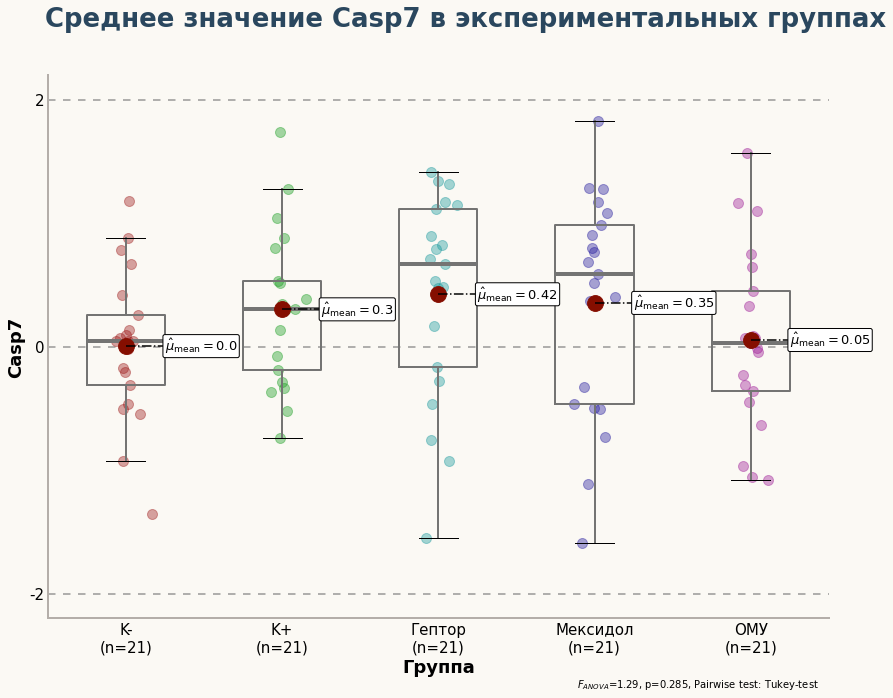

 F-Anova 1.29, p = 0.2837
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2977 0.6899  -0.337 0.9324  False
     0      2   0.4196 0.3586 -0.2151 1.0542  False
     0      3   0.3496 0.5455 -0.2851 0.9842  False
     0      4   0.0495 0.9995 -0.5852 0.6841  False
     1      2   0.1219 0.9837 -0.5128 0.7565  False
     1      3   0.0519 0.9994 -0.5828 0.6865  False
     1      4  -0.2483  0.813 -0.8829 0.3864  False
     2      3    -0.07 0.9981 -0.7047 0.5647  False
     2      4  -0.3701 0.4882 -1.0048 0.2645  False
     3      4  -0.3001 0.6833 -0.9348 0.3345  False
---------------------------------------------------


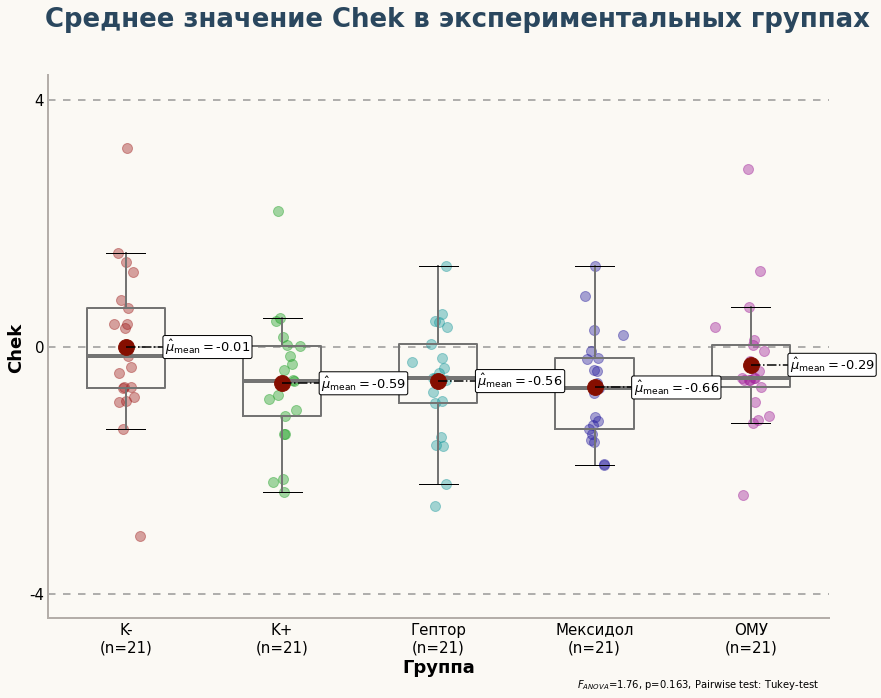

 F-Anova 1.76, p = 0.1619
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.5867 0.3651 -1.4797 0.3064  False
     0      2   -0.551 0.4301  -1.444 0.3421  False
     0      3  -0.6545 0.2566 -1.5476 0.2385  False
     0      4  -0.2877 0.8981 -1.1808 0.6053  False
     1      2   0.0357    1.0 -0.8574 0.9287  False
     1      3  -0.0679 0.9996 -0.9609 0.8252  False
     1      4   0.2989 0.8846 -0.5941  1.192  False
     2      3  -0.1035 0.9976 -0.9966 0.7895  False
     2      4   0.2633 0.9242 -0.6298 1.1563  False
     3      4   0.3668 0.7843 -0.5263 1.2598  False
---------------------------------------------------


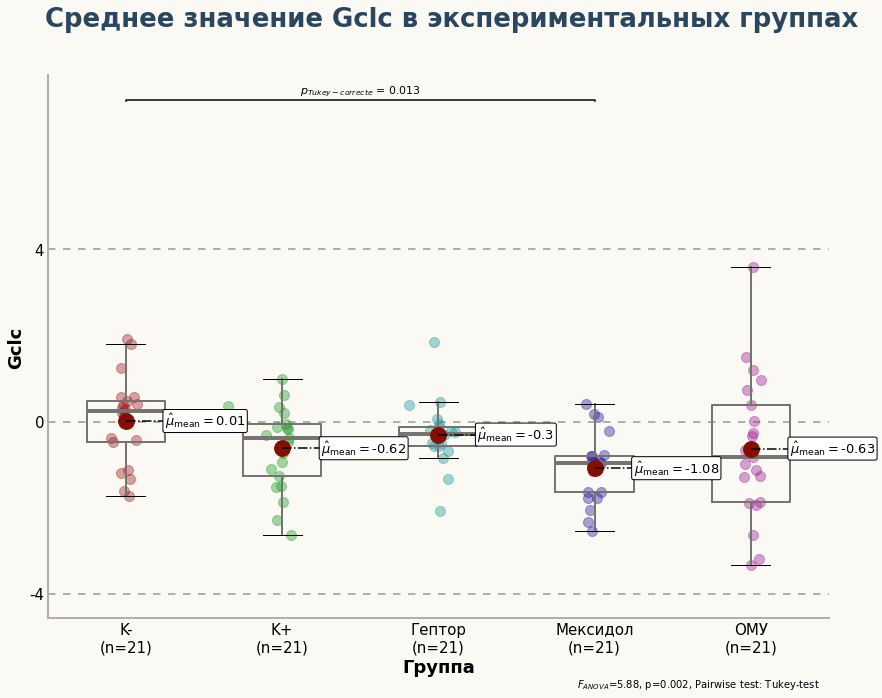

 F-Anova 5.88, p = 0.0011
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.6323 0.3324 -1.5645  0.2999  False
     0      2  -0.3152 0.8809 -1.2474   0.617  False
     0      3  -1.0961 0.0127 -2.0283 -0.1639   True
     0      4  -0.6405 0.3194 -1.5727  0.2917  False
     1      2   0.3171 0.8785 -0.6151  1.2493  False
     1      3  -0.4638 0.6404  -1.396  0.4684  False
     1      4  -0.0082    1.0 -0.9404   0.924  False
     2      3   -0.781 0.1449 -1.7132  0.1512  False
     2      4  -0.3253 0.8682 -1.2575  0.6069  False
     3      4   0.4556 0.6558 -0.4766  1.3878  False
----------------------------------------------------


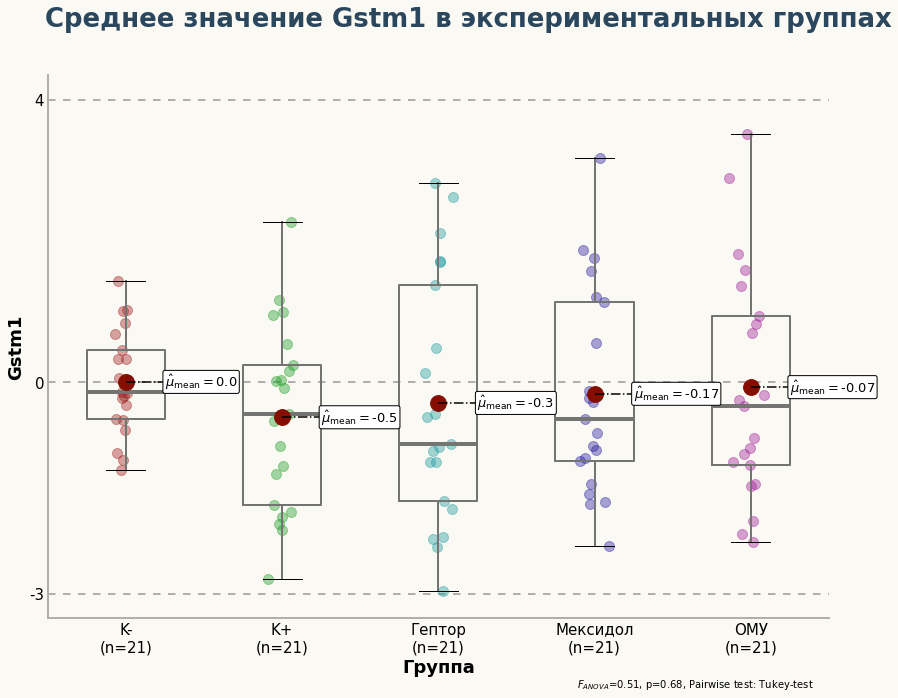

 F-Anova 0.51, p = 0.6794
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   -0.501  0.784   -1.72 0.7181  False
     0      2  -0.2981 0.9605 -1.5171 0.9209  False
     0      3  -0.1686 0.9953 -1.3876 1.0505  False
     0      4  -0.0743 0.9998 -1.2933 1.1448  False
     1      2   0.2029 0.9905 -1.0162 1.4219  False
     1      3   0.3324  0.942 -0.8867 1.5514  False
     1      4   0.4267  0.867 -0.7924 1.6457  False
     2      3   0.1295 0.9983 -1.0895 1.3486  False
     2      4   0.2238 0.9862 -0.9952 1.4429  False
     3      4   0.0943 0.9995 -1.1248 1.3133  False
---------------------------------------------------


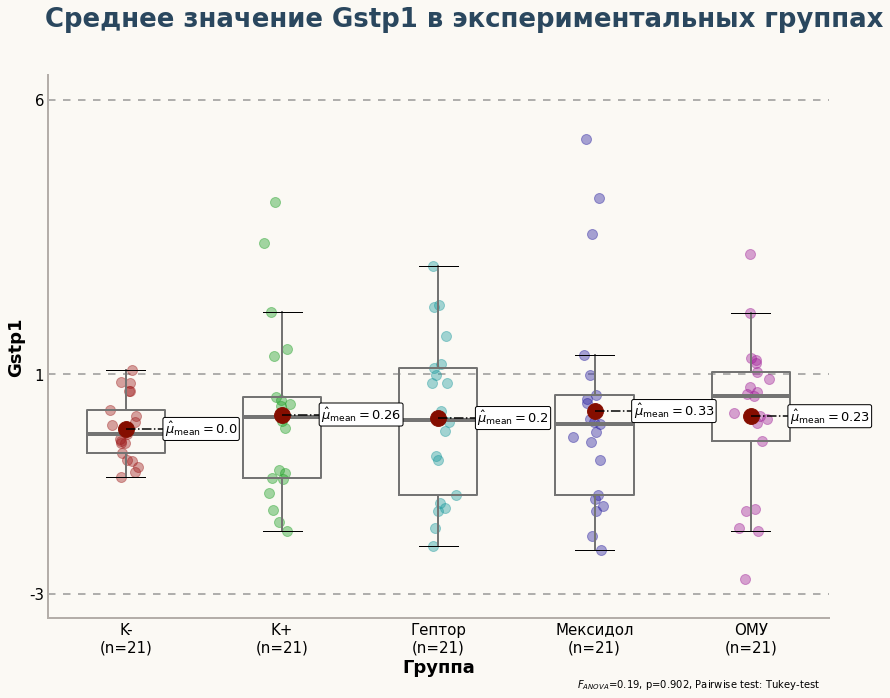

 F-Anova 0.19, p = 0.9013
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2632 0.9775 -0.9935 1.5199  False
     0      2    0.199 0.9921 -1.0576 1.4557  False
     0      3   0.3262 0.9512 -0.9305 1.5829  False
     0      4   0.2324 0.9858 -1.0243  1.489  False
     1      2  -0.0641 0.9999 -1.3208 1.1925  False
     1      3    0.063 0.9999 -1.1937 1.3197  False
     1      4  -0.0308    1.0 -1.2875 1.2259  False
     2      3   0.1271 0.9986 -1.1295 1.3838  False
     2      4   0.0333    1.0 -1.2233   1.29  False
     3      4  -0.0938 0.9996 -1.3505 1.1629  False
---------------------------------------------------


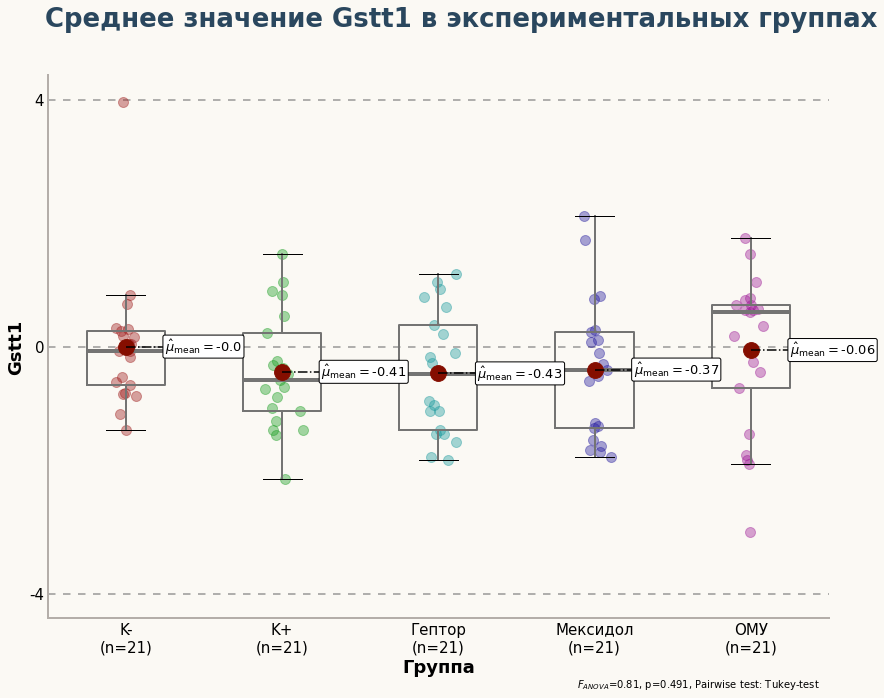

 F-Anova 0.81, p = 0.4895
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.4081 0.7398 -1.3374 0.5212  False
     0      2  -0.4338 0.6937 -1.3631 0.4955  False
     0      3  -0.3719    0.8 -1.3012 0.5574  False
     0      4  -0.0557 0.9998  -0.985 0.8736  False
     1      2  -0.0257    1.0  -0.955 0.9036  False
     1      3   0.0362    1.0 -0.8931 0.9655  False
     1      4   0.3524 0.8296 -0.5769 1.2817  False
     2      3   0.0619 0.9997 -0.8674 0.9912  False
     2      4   0.3781 0.7901 -0.5512 1.3074  False
     3      4   0.3162 0.8784 -0.6131 1.2455  False
---------------------------------------------------


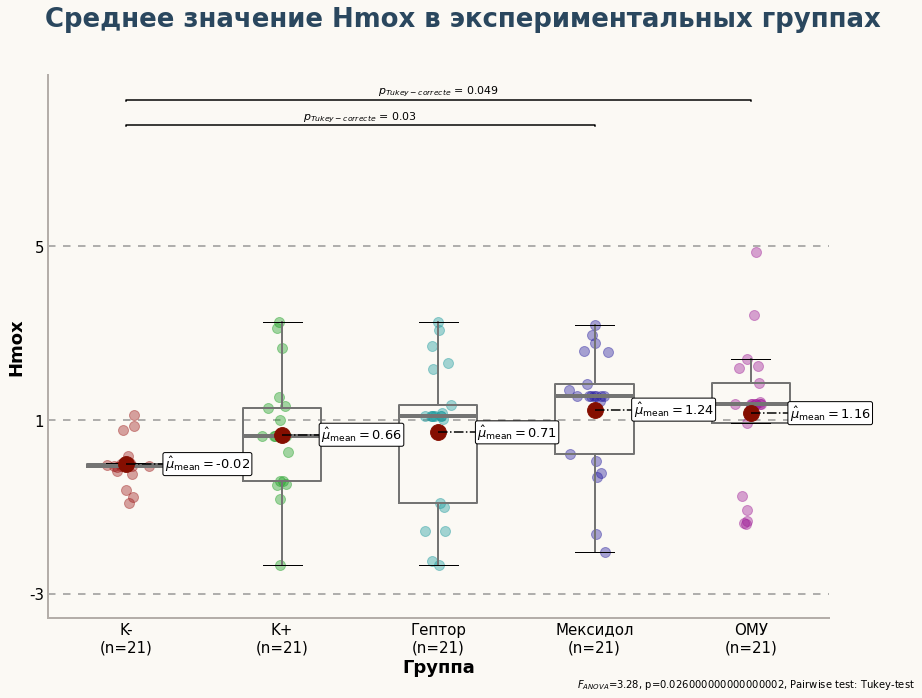

 F-Anova 3.28, p = 0.025
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.6757 0.4988 -0.4951 1.8465  False
     0      2   0.7307 0.4182 -0.4401 1.9015  False
     0      3   1.2538 0.0295   0.083 2.4246   True
     0      4   1.1726 0.0495  0.0018 2.3434   True
     1      2    0.055 0.9999 -1.1158 1.2258  False
     1      3   0.5781 0.6471 -0.5927 1.7489  False
     1      4   0.4969 0.7633 -0.6739 1.6677  False
     2      3   0.5231 0.7273 -0.6477 1.6939  False
     2      4   0.4419  0.832 -0.7289 1.6127  False
     3      4  -0.0812 0.9997  -1.252 1.0896  False
---------------------------------------------------


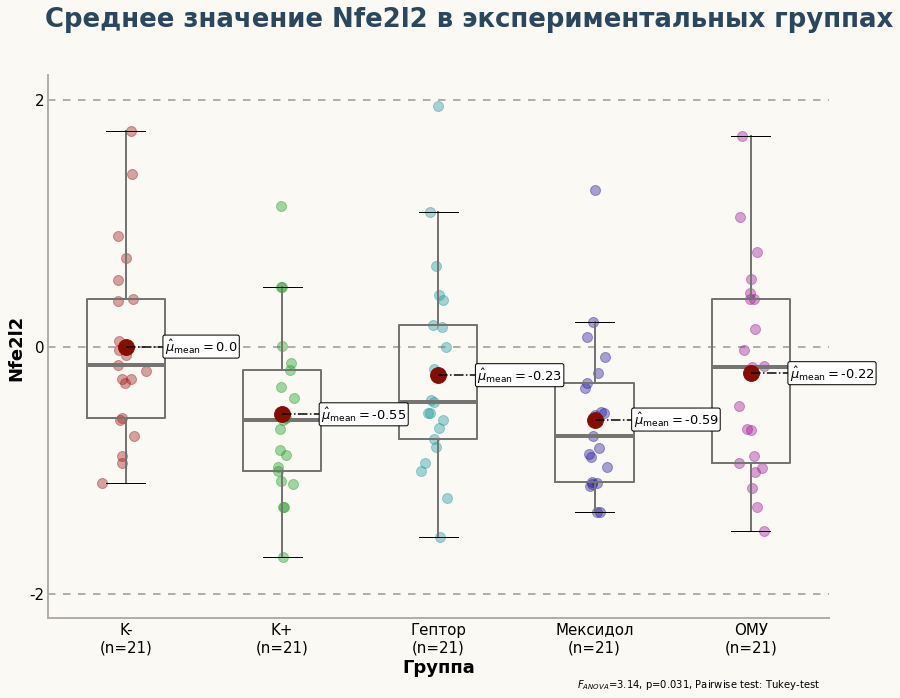

 F-Anova 3.14, p = 0.0299
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.5481 0.1322 -1.1906 0.0944  False
     0      2  -0.2314 0.8544 -0.8739  0.411  False
     0      3  -0.5905 0.0872 -1.2329  0.052  False
     0      4  -0.2152 0.8843 -0.8577 0.4272  False
     1      2   0.3167 0.6486 -0.3258 0.9591  False
     1      3  -0.0424 0.9997 -0.6848 0.6001  False
     1      4   0.3329 0.6039 -0.3096 0.9753  False
     2      3   -0.359 0.5311 -1.0015 0.2834  False
     2      4   0.0162    1.0 -0.6263 0.6587  False
     3      4   0.3752 0.4866 -0.2672 1.0177  False
---------------------------------------------------


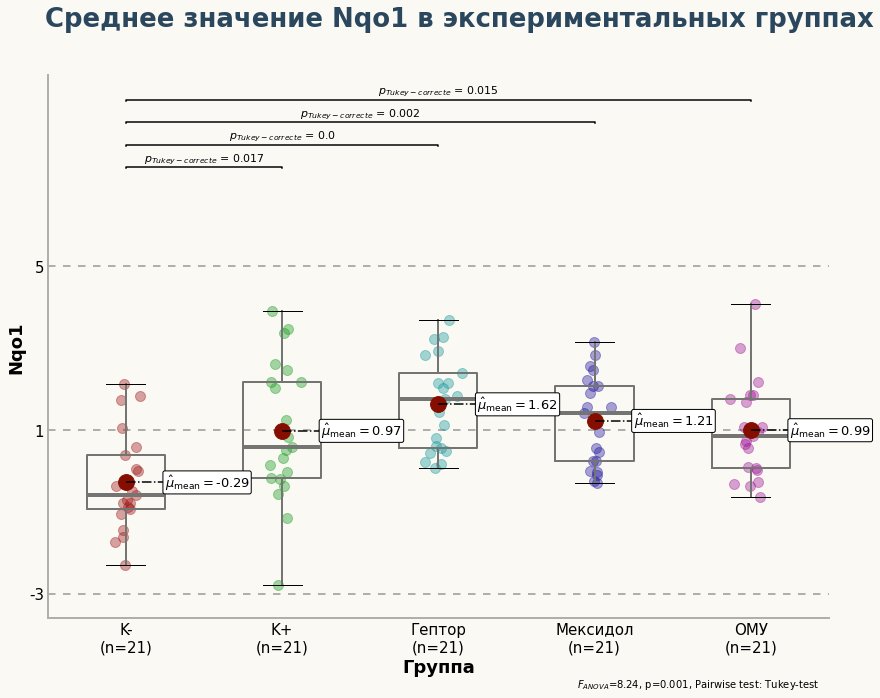

 F-Anova 8.24, p = 0.0001
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   1.2579 0.0172  0.1538  2.362   True
     0      2    1.905 0.0001  0.8009 3.0091   True
     0      3   1.4998 0.0025  0.3957 2.6039   True
     0      4   1.2731 0.0153   0.169 2.3772   True
     1      2   0.6471  0.483  -0.457 1.7512  False
     1      3   0.2419 0.9734 -0.8622  1.346  False
     1      4   0.0152    1.0 -1.0889 1.1193  False
     2      3  -0.4052 0.8457 -1.5093 0.6989  False
     2      4  -0.6319 0.5073  -1.736 0.4722  False
     3      4  -0.2267 0.9791 -1.3308 0.8774  False
---------------------------------------------------


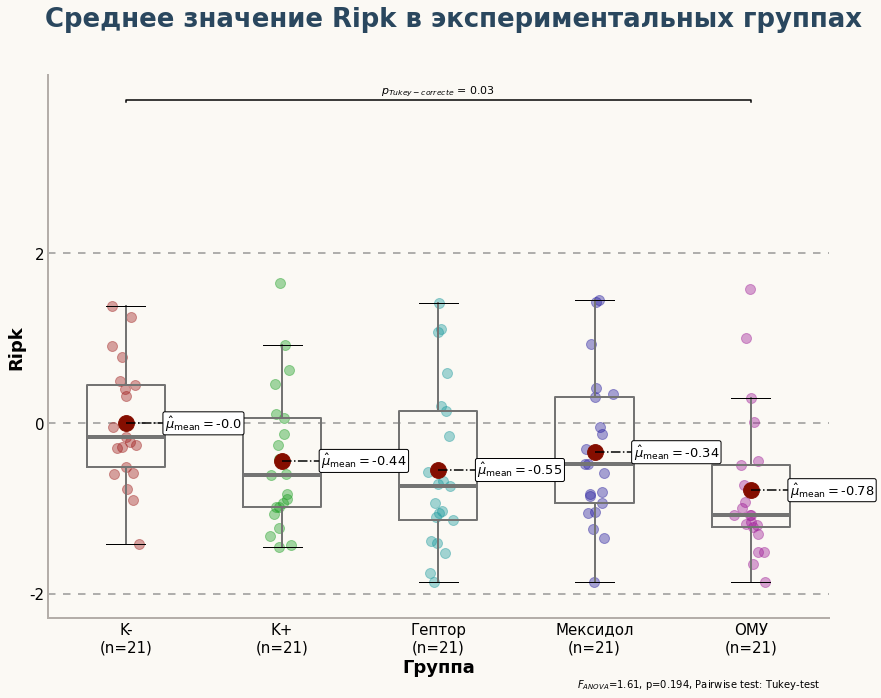

 F-Anova 1.61, p = 0.1926
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.4414 0.4586 -1.1768   0.294  False
     0      2  -0.5481  0.241 -1.2835  0.1873  False
     0      3   -0.339 0.7035 -1.0745  0.3964  False
     0      4  -0.7849 0.0303 -1.5203 -0.0495   True
     1      2  -0.1067 0.9944 -0.8421  0.6287  False
     1      3   0.1024 0.9952  -0.633  0.8378  False
     1      4  -0.3435 0.6933 -1.0789  0.3919  False
     2      3    0.209  0.933 -0.5264  0.9445  False
     2      4  -0.2368 0.8983 -0.9722  0.4986  False
     3      4  -0.4459 0.4483 -1.1813  0.2896  False
----------------------------------------------------


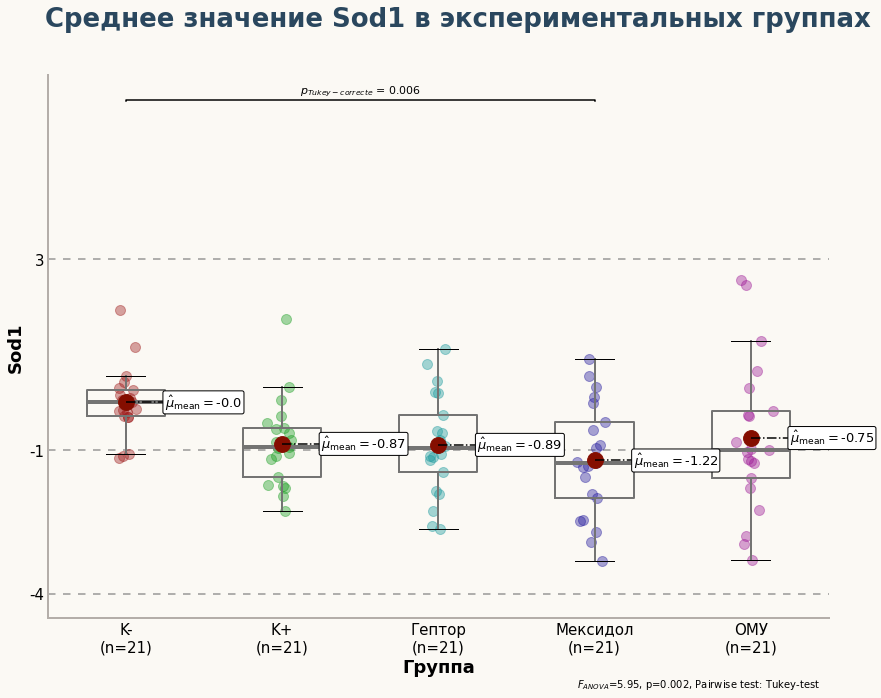

 F-Anova 5.95, p = 0.001
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.8681 0.0974 -1.8304  0.0942  False
     0      2   -0.889 0.0845 -1.8514  0.0733  False
     0      3  -1.2152  0.006 -2.1776 -0.2529   True
     0      4  -0.7459 0.2062 -1.7082  0.2164  False
     1      2   -0.021    1.0 -0.9833  0.9414  False
     1      3  -0.3471 0.8538 -1.3095  0.6152  False
     1      4   0.1222 0.9966 -0.8401  1.0845  False
     2      3  -0.3262 0.8799 -1.2885  0.6361  False
     2      4   0.1432 0.9938 -0.8192  1.1055  False
     3      4   0.4694 0.6576  -0.493  1.4317  False
----------------------------------------------------


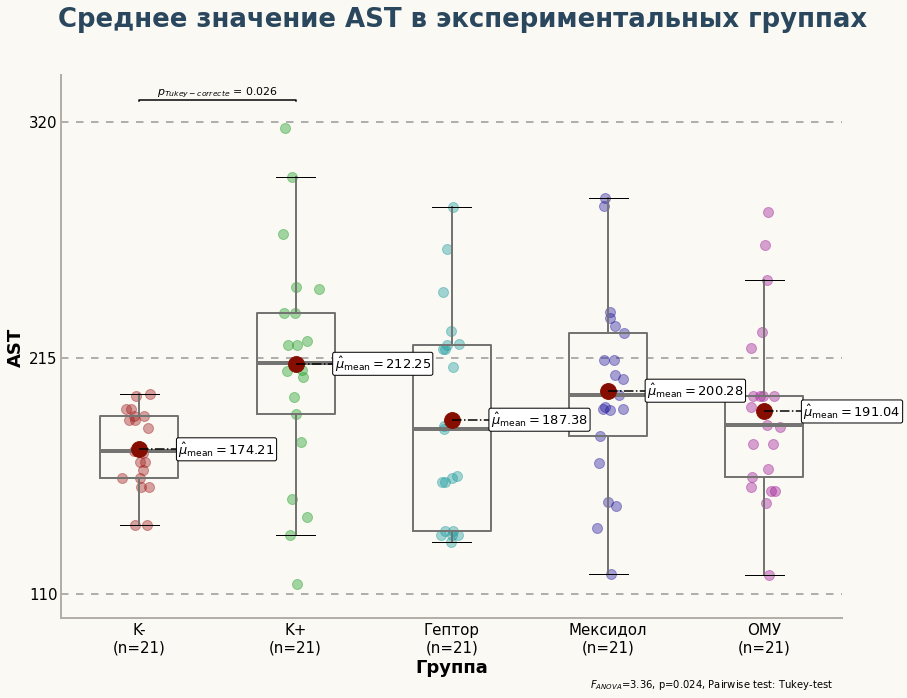

 F-Anova 3.36, p = 0.0229
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  38.0381 0.0258   3.0861 72.9901   True
     0      2  13.1667  0.833 -21.7853 48.1186  False
     0      3  26.0695 0.2403  -8.8824 61.0215  False
     0      4  16.8286 0.6685 -18.1234 51.7805  False
     1      2 -24.8714 0.2848 -59.8234 10.0805  False
     1      3 -11.9686 0.8759 -46.9205 22.9834  False
     1      4 -21.2095 0.4473 -56.1615 13.7424  False
     2      3  12.9029  0.843 -22.0491 47.8548  False
     2      4   3.6619 0.9984 -31.2901 38.6139  False
     3      4   -9.241 0.9479 -44.1929  25.711  False
-----------------------------------------------------


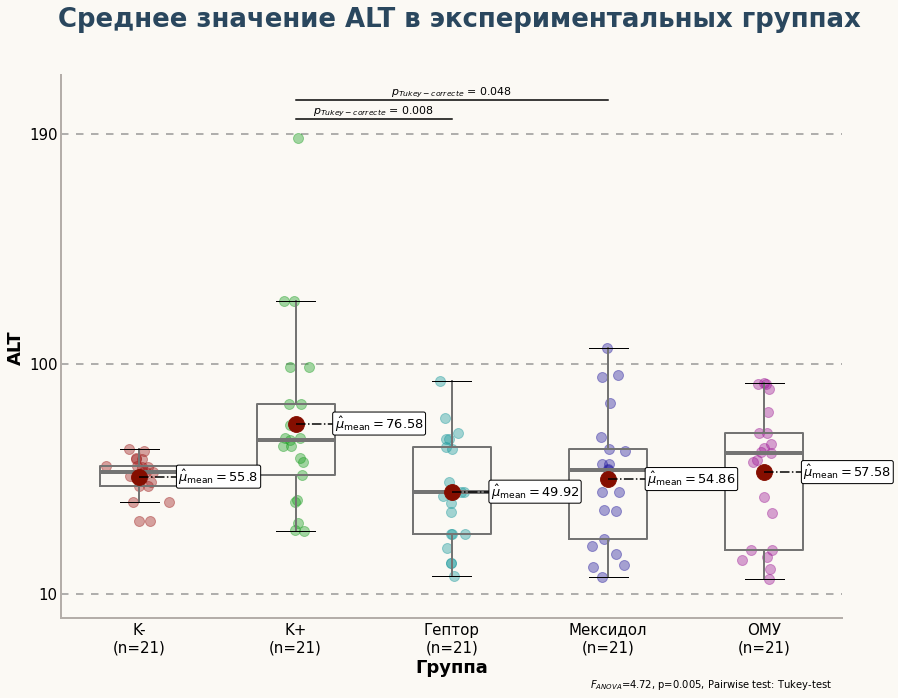

 F-Anova 4.72, p = 0.0044
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  20.7762 0.0653  -0.8166  42.369  False
     0      2   -5.881 0.9422 -27.4737 15.7118  False
     0      3  -0.9429    1.0 -22.5356 20.6499  False
     0      4   1.7762 0.9994 -19.8166  23.369  False
     1      2 -26.6571 0.0077 -48.2499 -5.0644   True
     1      3  -21.719 0.0479 -43.3118 -0.1263   True
     1      4    -19.0 0.1121 -40.5928  2.5928  False
     2      3   4.9381 0.9689 -16.6547 26.5309  False
     2      4   7.6571 0.8614 -13.9356 29.2499  False
     3      4    2.719 0.9967 -18.8737 24.3118  False
-----------------------------------------------------


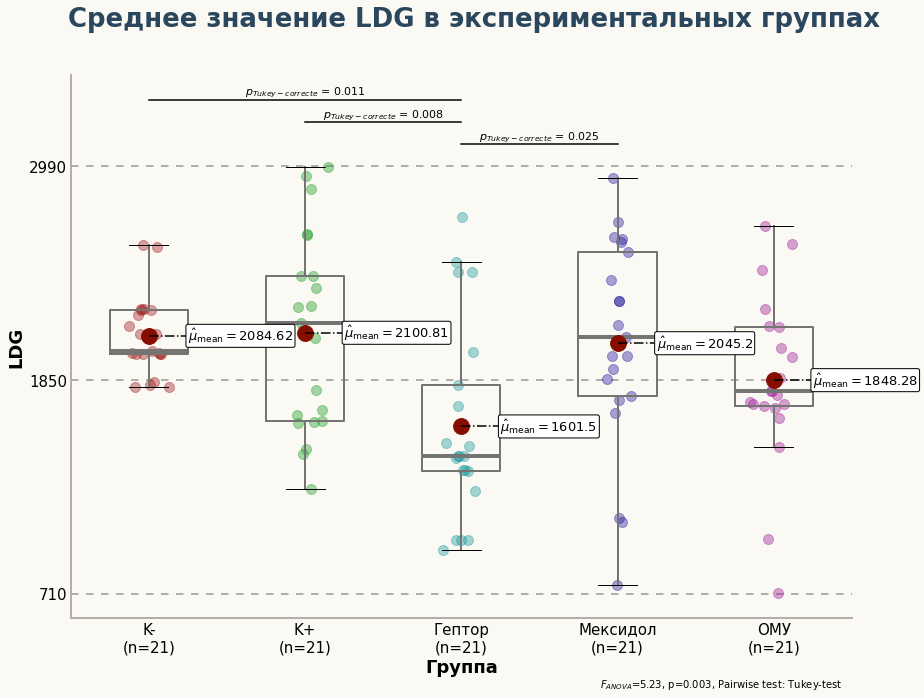

 F-Anova 5.23, p = 0.0024
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     0      1   16.1905    1.0  -390.491 422.8719  False
     0      2 -483.1238 0.0115 -889.8053 -76.4424   True
     0      3  -39.4143 0.9988 -446.0957 367.2672  False
     0      4 -236.3429 0.4917 -643.0243 170.3386  False
     1      2 -499.3143 0.0081 -905.9957 -92.6328   True
     1      3  -55.6048 0.9955 -462.2862 351.0767  False
     1      4 -252.5333 0.4234 -659.2148 154.1481  False
     2      3  443.7095 0.0252   37.0281  850.391   True
     2      4   246.781 0.4473 -159.9005 653.4624  False
     3      4 -196.9286 0.6637   -603.61 209.7529  False
--------------------------------------------------------


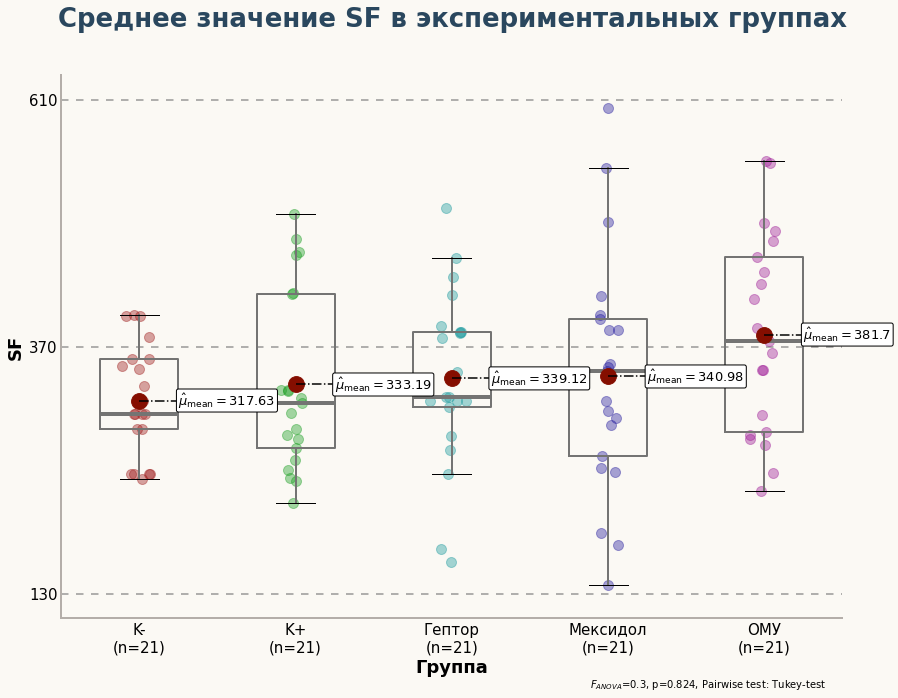

 F-Anova 0.3, p = 0.8228
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  15.5571 0.9805 -61.6693  92.7836  False
     0      2  21.4905 0.9378  -55.736   98.717  False
     0      3  23.3476 0.9175 -53.8789 100.5741  False
     0      4  64.0714 0.1519 -13.1551 141.2979  False
     1      2   5.9333 0.9995 -71.2931  83.1598  False
     1      3   7.7905 0.9986  -69.436   85.017  False
     1      4  48.5143 0.4114 -28.7122 125.7408  False
     2      3   1.8571    1.0 -75.3693  79.0836  False
     2      4   42.581 0.5445 -34.6455 119.8074  False
     3      4  40.7238 0.5874 -36.5027 117.9503  False
------------------------------------------------------


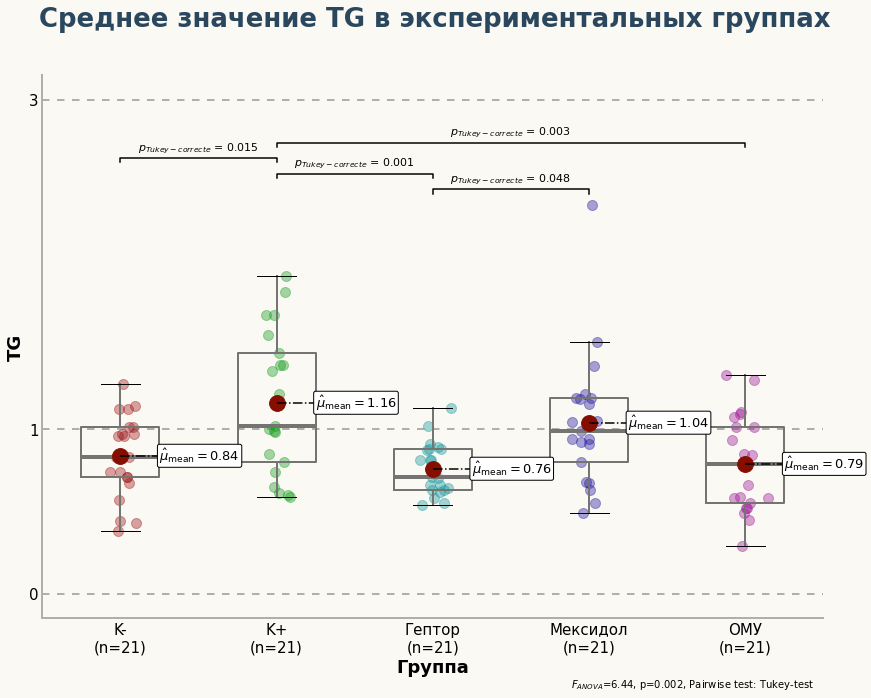

 F-Anova 6.44, p = 0.0006
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.3219 0.0147   0.044  0.5998   True
     0      2  -0.0786 0.9343 -0.3565  0.1994  False
     0      3    0.201 0.2695  -0.077  0.4789  False
     0      4   -0.049 0.9881  -0.327  0.2289  False
     1      2  -0.4005 0.0011 -0.6784 -0.1225   True
     1      3   -0.121 0.7462 -0.3989   0.157  False
     1      4   -0.371 0.0031 -0.6489  -0.093   True
     2      3   0.2795  0.048  0.0016  0.5575   True
     2      4   0.0295 0.9983 -0.2484  0.3075  False
     3      4    -0.25 0.0991 -0.5279  0.0279  False
----------------------------------------------------


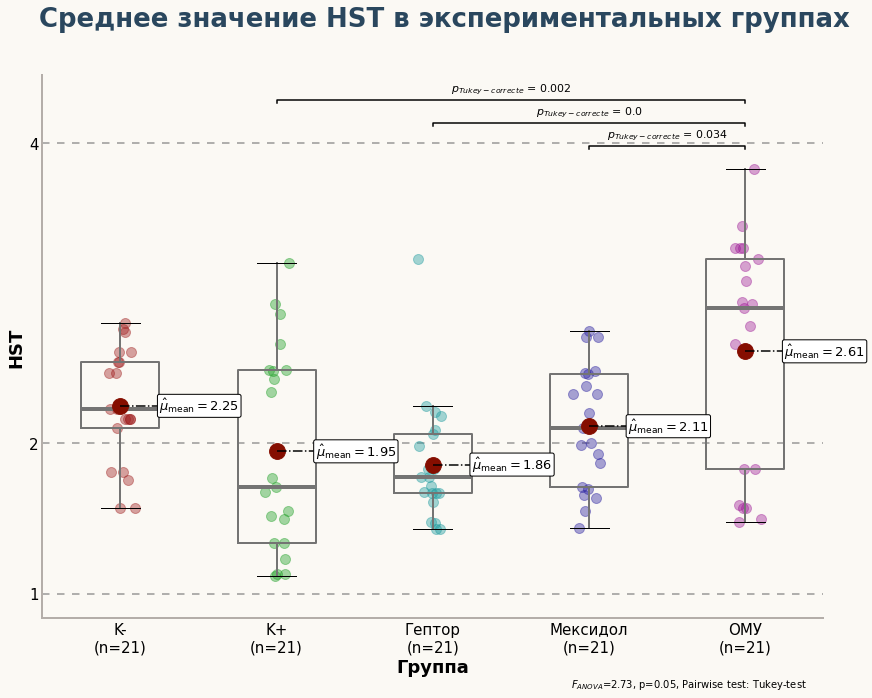

 F-Anova 2.73, p = 0.0491
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3029 0.3917 -0.7759 0.1702  False
     0      2   -0.391 0.1548  -0.864 0.0821  False
     0      3  -0.1357 0.9309 -0.6088 0.3373  False
     0      4   0.3629 0.2153 -0.1102 0.8359  False
     1      2  -0.0881 0.9854 -0.5611  0.385  False
     1      3   0.1671  0.863 -0.3059 0.6402  False
     1      4   0.6657 0.0016  0.1927 1.1388   True
     2      3   0.2552 0.5656 -0.2178 0.7283  False
     2      4   0.7538 0.0002  0.2808 1.2269   True
     3      4   0.4986 0.0336  0.0255 0.9716   True
---------------------------------------------------


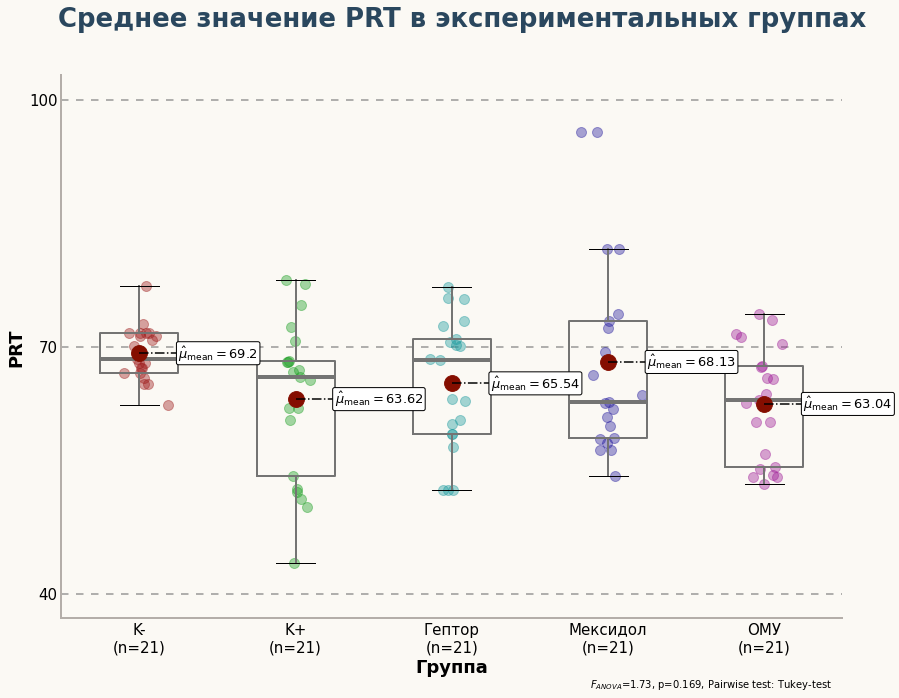

 F-Anova 1.73, p = 0.1681
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -5.5714 0.2138 -12.8224  1.6795  False
     0      2  -3.6571 0.6283 -10.9081  3.5938  False
     0      3  -1.0619 0.9942  -8.3129   6.189  False
     0      4  -6.1571 0.1354 -13.4081  1.0938  False
     1      2   1.9143 0.9482  -5.3367  9.1652  False
     1      3   4.5095 0.4218  -2.7414 11.7605  False
     1      4  -0.5857 0.9994  -7.8367  6.6652  False
     2      3   2.5952 0.8573  -4.6557  9.8462  False
     2      4     -2.5 0.8732  -9.7509  4.7509  False
     3      4  -5.0952 0.2971 -12.3462  2.1557  False
-----------------------------------------------------


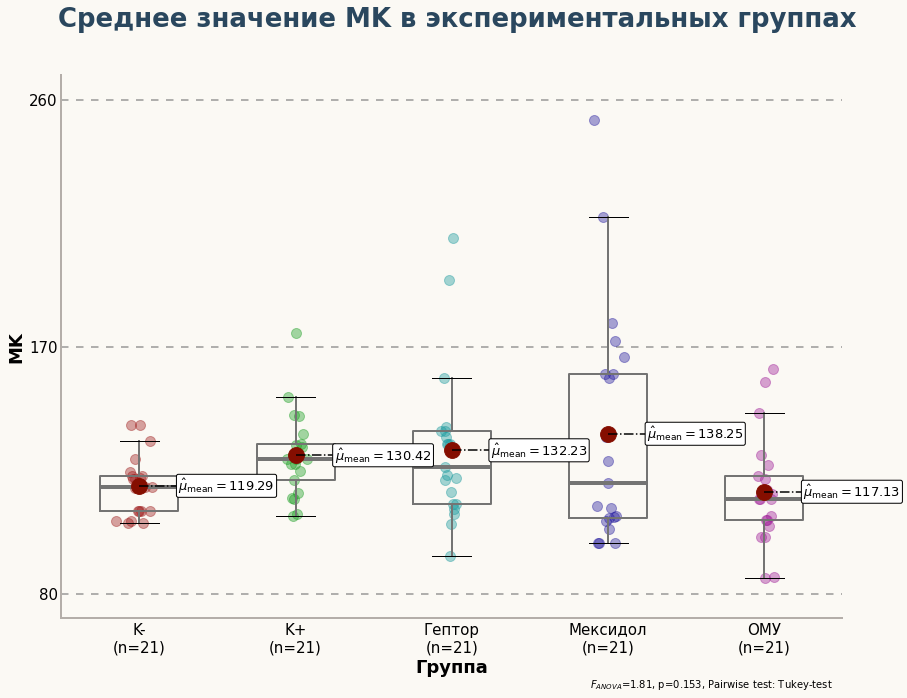

 F-Anova 1.81, p = 0.1519
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  11.1286 0.6256 -10.8692 33.1264  False
     0      2  12.9381 0.4795  -9.0597 34.9359  False
     0      3  18.9619 0.1252  -3.0359 40.9597  False
     0      4  -2.1571 0.9988 -24.1549 19.8406  False
     1      2   1.8095 0.9994 -20.1883 23.8073  False
     1      3   7.8333 0.8596 -14.1645 29.8311  False
     1      4 -13.2857 0.4522 -35.2835  8.7121  False
     2      3   6.0238 0.9411  -15.974 28.0216  False
     2      4 -15.0952 0.3207  -37.093  6.9026  False
     3      4  -21.119 0.0662 -43.1168  0.8787  False
-----------------------------------------------------


In [63]:
for i in spisok_group:
    group = i
    
    # Получить виды, отсортированные по алфавиту
    species = sorted(data["group"].unique())
    
    # y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data = [data[data["group"] == specie][group].values for specie in species]
    
    # Создать искаженную версию "x" (это только 0, 1 и 2)
    # Подробнее об этом в бонус-треке!
    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    # Colors
    BG_WHITE = "#fbf9f4"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"
    
    # Colors taken from Dark2 palette in RColorBrewer R library
    COLOR_SCALE = ["#9e1b1b", "#1b9e22", "#1b9a9e", "#241b9e", "#9e1b97",]
    
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1, 2, 3, 4]
    
    # Horizontal lines надо потом вычислит формулой

    if data[group].max() > 100:
        HLINES = [(math.floor(data[group].min()/10))*10 , 
                  math.floor(((math.floor(data[group].min()/10))*10 + (math.ceil(data[group].max()/10))*10)/2), 
                  (math.ceil(data[group].max()/10))*10 ]
    elif data[group].max() > 20: 
        HLINES = [(math.floor(data[group].min()/5))*5 , 
                  math.floor(((math.floor(data[group].min()/5))*5 + (math.ceil(data[group].max()/5))*5)/2), 
                  (math.ceil(data[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data[group].min())) , 
                  math.floor(((math.floor(data[group].min())) + (math.ceil(data[group].max())))/2), 
                  (math.ceil(data[group].max()))]        

    fig, ax = plt.subplots(figsize= (14, 10))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавляем скрипки -------------------------------------------------------------- -----
    # bw_method="silverman" означает пропускную способность плотности ядра
    # оценка вычисляется по эмпирическому правилу Сильвермана.
    # Подробнее об этом в бонус-треке ;)

    # Вывод сохраняется в 'скрипках', используемых для настройки их внешнего вида
    #violins = ax.violinplot(
    #    y_data, 
    #    positions=POSITIONS,
    #    widths=0.45,
    #    bw_method="silverman",
    #    showmeans=False, 
    #    showmedians=False,
    #    showextrema=False
    #)

    # Настроить скрипки (удалить заливку, настроить линию и т. д.)
    #for pc in violins["bodies"]:
    #    pc.set_facecolor("none")
    #    pc.set_edgecolor(BLACK)
    #    pc.set_linewidth(1.4)
    #    pc.set_alpha(1)
    

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    # Add jittered dots ----------------------------------------------
    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.4)
    
    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
    fvalue, pvalue = st.f_oneway(data[data['group'] == species[0]][group], 
                                 data[data['group'] == species[1]][group],
                                 data[data['group'] == species[2]][group], 
                                 data[data['group'] == species[3]][group])

    # perform multiple pairwise comparison (Tukey HSD)
    m_comp = pairwise_tukeyhsd(endog=data[group], groups=data['group'], alpha=0.05)
    
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )

    # Добавить несколько сравнений p-значение для средней разницы -----------
    # Линии графика, указывающие, какие средства сравниваются
    # 'tick_len' задает длину галочки в конце каждой строки
    # дучше прибавлять по 4%

    if data[group].min() < 0:
        po = data[group].max() - data[group].min()
        p1 = 0.08
    else:
        po = data[group].max()
        p1 = 0.04
        
    p = po + po * p1
    
    if data[group].max() > 300:
        tick_len = 0.5
        pad = 0.2
    elif data[group].max() > 100:
        tick_len = 0.25
        pad = 0.1
    elif data[group].max() > 10:
        tick_len = 0.12
        pad = 0.05
    else: 
        tick_len = 0.025
        pad = 0.02

    #полоски со значимостью порядок полос 7 4 5 9 0 8 1 6 2 3  

    if m_comp.pvalues[7] <= 0.05:
        ax.plot([2, 2, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[7], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[4] <= 0.05:
        ax.plot([1, 1, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[4], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[5] <= 0.05:
        ax.plot([1, 1, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[5], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[9] <= 0.05:
        ax.plot([3, 3, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[9], 3)}"
        ax.text(3.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[0] <= 0.05:
        ax.plot([0, 0, 1, 1], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[0], 3)}"
        ax.text(0.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[8] <= 0.05:
        ax.plot([2, 2, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[8], 3)}"
        ax.text(3, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[1] <= 0.05:
        ax.plot([0, 0, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[1], 3)}"
        ax.text(1, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[6] <= 0.05:
        ax.plot([1, 1, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[6], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[2] <= 0.05:
        ax.plot([0, 0, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[2], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[3] <= 0.05:
        ax.plot([0, 0, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[3], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    # Настройка макета --------------------------------------------------------------
    # Скрыть шипы
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_linewidth(2)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")

    # xlabels учитывает размер выборки для каждого вида
    xlabels = [f"{name_group[specie]}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
    ax.set_xlabel("Группа", size=18, weight="bold")
    
    # Рисунок используется для заголовка, а ось — для подзаголовка.
    # Заголовок
 

    fig.suptitle(
        f"Среднее значение {group} в экспериментальных группах",
        x = 0.122,
        y = 0.975,
        ha="left",
        fontsize=26,
    #    fontname="Lobster Two",
        color=BLUE,
        weight="bold",    
    )

    # # Подзаголовок
      
    stats = [
        f"$F_{{ANOVA}}$={round(fvalue,2)}",
        f"p={round(pvalue,3)+0.001}",
        f"Pairwise test: Tukey-test"
    ]

    
    #ax.set_title(
    #    ", ".join(stats),
    #    loc="left",
    #    ha="left",
    #    fontsize=20,
    #    color=BLUE_DARK
    #)
    
    # Примечания внизу справа
    fig.text(
        0.65,
        0.03,
        ", ".join(stats),
        fontsize=10
    )
    
    plt.show()
    
    print(f' F-Anova {round(fvalue, 2)}, p = {round(pvalue, 4)}')
    print(m_comp)

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = st.f_oneway(data[data['Группа'] == species[0]][group], 
                                 data[data['Группа'] == species[1]][group],
                                 data[data['Группа'] == species[2]][group], 
                                 data[data['Группа'] == species[3]][group])

    # perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=data['АСТ'], groups=data['Группа'], alpha=0.05)
    

In [ ]:
pairwise_tukeyhsd(endog=data['АСТ'], groups=data['Группа'], alpha=0.05)

In [ ]:
print(m_comp)

In [ ]:
nabor1 = {'znach' : ['Статистический анализ показал, что различия','При анализе данных было показано, что различия'],
          'neznach' : ['В результате проведенного статистического анализа было показано, что различия',
                       'После анализа данных было показано, что различия']}

nabor2 = {'expr' : ['в средней экспрессии','средней кратности экспрессии'],
          'bh' : ['средний уровень', 'средний показатель']}

nabor3 = {'1' : ['в экспериментальных группах','в группах сравнения']}

nabor4 = {'znach' : ['достигли уровня статистической значимости','имели статистически значимые различия'],
          'neznach' : ['не достигли уровня статистической значимости', 'не имели различий']}

nabor5 = {'1' : ['Минимальный уровень наблюдался в группе - ','Наименьшие значения показателя наблюдались в группе - ']}

nabor6 = {'1' : ['Максимальный уровень наблюдался в группе - ','Наибольший значения показателя наблюдались в группе - ']}

nabor7 = {'1' : [', и составили','и былb равны']}



ghoup= 'GSTMkidney'

r1 = random.randint(0,len(nabor1['znach'])-1)
r2 = random.randint(0,len(nabor2['expr'])-1)
r3 = random.randint(0,len(nabor3['1'])-1)
r4 = random.randint(0,len(nabor4['znach'])-1)
r5 = random.randint(0,len(nabor5['1'])-1)
r6 = random.randint(0,len(nabor6['1'])-1)
r7 = random.randint(0,len(nabor7['1'])-1)

priznaki = {'GSTMkidney': ['GSTM kidney','gen','expr']
}


if pvalue > 0.05:
    znach = 'neznach'
else:
    znach = 'znach'

group_max_name = ''
group_max = -10000
for i in range(0,5):
    if np.mean(data[data['Группа'] == i][ghoup]) > group_max:
        group_max = np.mean(data[data['Группа'] == i][ghoup])
        group_max_name = name_group[i]
        
group_min_name = ''
group_min = 10000

for i in range(0,5):
    if np.mean(data[data['Группа'] == i][ghoup]) < group_min:
        group_min = np.mean(data[data['Группа'] == i][ghoup])
        group_min_name = name_group[i]
    
print(group_min)
print(group_min_name)

    
print(group_max)
print(group_max_name)
    
print(nabor1[znach][r1], nabor2[priznaki[ghoup][2]][r2], 
      priznaki[ghoup][0],
      nabor3['1'][r3], nabor4[znach][r4], 
      f'(F={round(fvalue, 2)}, p={round(pvalue, 4)}).',
     
      nabor5['1'][r5], group_min_name,
      nabor7['1'][r7], round(group_min,2),
      nabor6['1'][r6], group_max_name,
      nabor7['1'][r7], round(group_max,2),      
     )
